<a href="https://colab.research.google.com/github/aplneto/IF702/blob/master/mini_project01_mlp_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot
from tensorflow.python.keras.callbacks import History

%matplotlib inline

def plot_history(history: dict):
  pyplot.plot(list(range(len(history['accuracy']))), history['accuracy'], label='accuracy', color='red')
  pyplot.plot(list(range(len(history['precision']))), history['precision'], label='precision', color='green')
  pyplot.plot(list(range(len(history['recall']))), history['recall'], label='recall', color='blue')
  pyplot.legend()
  pyplot.title("Model Report")

In [ ]:
import numpy as np

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_x, train_y), (test_x, test_y) = mnist.load_data()

num_classes = len(set(train_y))

train_X = train_x.reshape(-1, 28, 28, 1).astype('float32')
test_X = test_x.reshape(-1, 28, 28, 1).astype('float32')


train_Y = to_categorical(train_y)
test_Y = to_categorical(test_y)

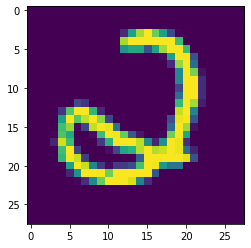

In [ ]:
pyplot.imshow(train_x[np.random.randint(0, len(train_x))])
pyplot.show()

In [ ]:
# Training settings

import tensorflow
from sklearn.model_selection import train_test_split

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y, test_size=1/6, random_state=4)

INPUT_SHAPE = train_X.shape[1:]
EPOCHS = 30
BATCH_SIZE = 10
LEARNING_RATE = 3
SGD = tensorflow.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

In [ ]:
# Implementação de callback para teste ao fim de cada época

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.exceptions import UndefinedMetricWarning
import warnings

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

class EpochTestCallback(tensorflow.keras.callbacks.Callback):
  def __init__(self, test_sample: np.ndarray, test_label: np.ndarray):
    self.test_X = test_sample
    self.test_Y = test_label
    self.metrics = {
        'accuracy': [],
        'precision': [],
        'recall': []
    }

  def on_epoch_end(self, epoch, logs=None):
    predictions = self.model.predict(self.test_X)
    y_test = np.argmax(self.test_Y, axis=-1)
    predictions = np.argmax(predictions, axis=-1)
    a = accuracy_score(self.test_Y, predictions)
    self.metrics['accuracy'].append(a)
    p = precision_score(self.test_Y, predictions, average='weighted')
    self.metrics['precision'].append(p)
    r = recall_score(self.test_Y, predictions, average='macro')
    self.metrics['recall'].append(r)

    print("Métricas para o conjunto de testes:\tAcurácia: {0}\tPrecisão: {1}\tRecall: {2}\n".format(a, p, r))

    self.__last_predictions = predictions
  
  def on_train_end(self, logs=None):
     plot_history(self.metrics)
     predictions = np.argmax(self.model.predict(test_X, batch_size=10000), axis=-1)
     print(classification_report(self.test_Y, predictions))
    
  def on_train_begin(self, logs=None):
    self.metrics = {
        'accuracy': [],
        'precision': [],
        'recall': []
    }

callback_list = [EpochTestCallback(test_X, test_y)]

# Modelo 1
* Camada oculta com 30 neurônios, camada de output com 10 neurônus
* $ \eta = 3.0 $

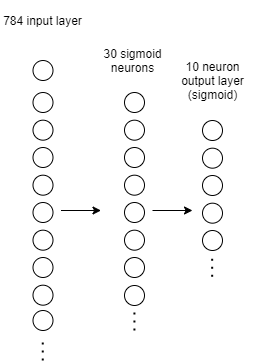


In [ ]:
import tensorflow
from tensorflow.keras import Sequential

model = Sequential()

model.add(tensorflow.keras.layers.InputLayer(INPUT_SHAPE))
model.add(tensorflow.keras.layers.Flatten())
model.add(tensorflow.keras.layers.Dense(num_classes * 3, activation='sigmoid'))
model.add(tensorflow.keras.layers.Dense(num_classes, activation='sigmoid'))

model.compile(metrics=['accuracy'], optimizer=SGD, loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0853 - accuracy: 0.2074 - val_loss: 0.0834 - val_accuracy: 0.2475
Métricas para o conjunto de testes:	Acurácia: 0.2414	Precisão: 0.12219377950522518	Recall: 0.22826730132328935

Epoch 2/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0859 - accuracy: 0.2013 - val_loss: 0.0853 - val_accuracy: 0.1792
Métricas para o conjunto de testes:	Acurácia: 0.174	Precisão: 0.22425945486148052	Recall: 0.17137943290612395

Epoch 3/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0837 - accuracy: 0.2399 - val_loss: 0.0854 - val_accuracy: 0.1766
Métricas para o conjunto de testes:	Acurácia: 0.1754	Precisão: 0.14140360210927724	Recall: 0.17951929646258902

Epoch 4/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0843 - accuracy: 0.1991 - val_loss: 0.0835 - val_accuracy: 0.2180
Métricas para o conjunto de testes:	Acurácia: 0.2221	Precisão: 0.14322827298711766	Recall

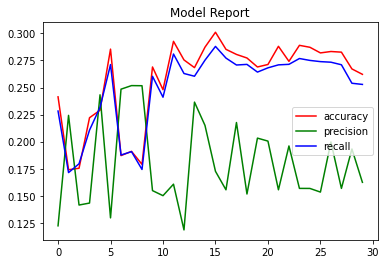

In [ ]:
history = model.fit(train_X, train_label, batch_size = BATCH_SIZE, epochs=EPOCHS, callbacks=callback_list, validation_data=(valid_X, valid_label))

# Modelo 2
* Variando a taxa de aprendizado e mantendo a mesma rede: $ \eta=0.001 $

In [ ]:
LEARNING_RATE = 0.001
SGD = tensorflow.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

model2 = Sequential()

model2.add(tensorflow.keras.layers.InputLayer(INPUT_SHAPE))
model2.add(tensorflow.keras.layers.Flatten())
model2.add(tensorflow.keras.layers.Dense(num_classes * 3, activation='sigmoid'))
model2.add(tensorflow.keras.layers.Dense(num_classes, activation='sigmoid'))

model2.compile(metrics=['accuracy'], optimizer=SGD, loss='mean_squared_error')

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1705 - accuracy: 0.1040 - val_loss: 0.1216 - val_accuracy: 0.1307
Métricas para o conjunto de testes:	Acurácia: 0.1326	Precisão: 0.23806772661458261	Recall: 0.1305404787527271

Epoch 2/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1076 - accuracy: 0.1728 - val_loss: 0.0985 - val_accuracy: 0.2157
Métricas para o conjunto de testes:	Acurácia: 0.2216	Precisão: 0.27279600307908886	Recall: 0.2153265886438484

Epoch 3/30
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0939 - accuracy: 0.2696 - val_loss: 0.0904 - val_accuracy: 0.3196
Métricas para o conjunto de testes:	Acurácia: 0.3221	Precisão: 0.33774297400151654	Recall: 0.3132511116150982

Epoch 4/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0884 - accuracy: 0.3509 - val_loss: 0.0865 - val_accuracy: 0.3837
Métricas para o conjunto de testes:	Acurácia: 0.3883	Precisão: 0.361221993931195	Recall: 0.

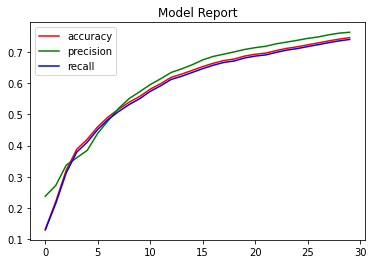

In [ ]:
history = model2.fit(train_X, train_label, batch_size = BATCH_SIZE, epochs=EPOCHS, callbacks=callback_list, validation_data=(valid_X, valid_label))

# Modelo 3

* Variadndo a taxa de aprendizagem na msma rede para: $ \eta= 0.1 $

In [ ]:
LEARNING_RATE = 0.1
SGD = tensorflow.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

model3 = Sequential()

model3.add(tensorflow.keras.layers.InputLayer(INPUT_SHAPE))
model3.add(tensorflow.keras.layers.Flatten())
model3.add(tensorflow.keras.layers.Dense(num_classes * 3, activation='sigmoid'))
model3.add(tensorflow.keras.layers.Dense(num_classes, activation='sigmoid'))

model3.compile(metrics=['accuracy'], optimizer=SGD, loss='mean_squared_error')

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0623 - accuracy: 0.6261 - val_loss: 0.0451 - val_accuracy: 0.7927
Métricas para o conjunto de testes:	Acurácia: 0.7988	Precisão: 0.8024338287286347	Recall: 0.7924144606361635

Epoch 2/30
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0383 - accuracy: 0.8169 - val_loss: 0.0356 - val_accuracy: 0.8273
Métricas para o conjunto de testes:	Acurácia: 0.8405	Precisão: 0.8436806041349287	Recall: 0.8366324783043064

Epoch 3/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0308 - accuracy: 0.8474 - val_loss: 0.0285 - val_accuracy: 0.8526
Métricas para o conjunto de testes:	Acurácia: 0.8641	Precisão: 0.8671679177173705	Recall: 0.861520592473461

Epoch 4/30
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0267 - accuracy: 0.8607 - val_loss: 0.0257 - val_accuracy: 0.8644
Métricas para o conjunto de testes:	Acurácia: 0.8701	Precisão: 0.8737826349794632	Recall: 0.868

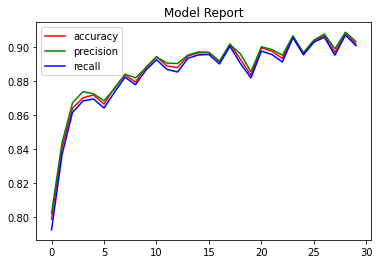

In [ ]:
history = model3.fit(train_X, train_label, batch_size = BATCH_SIZE, epochs=EPOCHS, callbacks=callback_list, validation_data=(valid_X, valid_label))

# Modelo 4
* Rede sem camadas ocultas

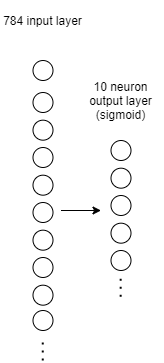

In [ ]:
model4 = Sequential()

model4.add(tensorflow.keras.layers.InputLayer(INPUT_SHAPE))
model4.add(tensorflow.keras.layers.Flatten())
model4.add(tensorflow.keras.layers.Dense(num_classes, activation='sigmoid'))

model4.compile(metrics=['accuracy'], optimizer=SGD, loss='mean_squared_error')

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0967 - accuracy: 0.1836 - val_loss: 0.0861 - val_accuracy: 0.2003
Métricas para o conjunto de testes:	Acurácia: 0.2059	Precisão: 0.30354206974356446	Recall: 0.19859024317535623

Epoch 2/30
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0854 - accuracy: 0.2351 - val_loss: 0.0845 - val_accuracy: 0.2474
Métricas para o conjunto de testes:	Acurácia: 0.2514	Precisão: 0.2877194931608013	Recall: 0.24182867301355454

Epoch 3/30
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0813 - accuracy: 0.2712 - val_loss: 0.0790 - val_accuracy: 0.2586
Métricas para o conjunto de testes:	Acurácia: 0.2626	Precisão: 0.29484137765816615	Recall: 0.2555648156599387

Epoch 4/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0779 - accuracy: 0.2826 - val_loss: 0.0768 - val_accuracy: 0.2903
Métricas para o conjunto de testes:	Acurácia: 0.2913	Precisão: 0.2761202166738686	Recall: 

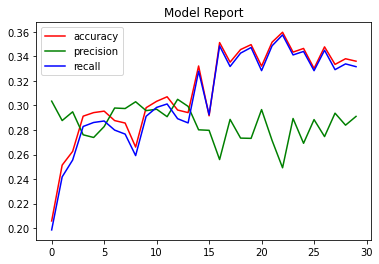

In [ ]:
history = model4.fit(train_X, train_label, batch_size = BATCH_SIZE, epochs=EPOCHS, callbacks=callback_list, validation_data=(valid_X, valid_label))

# Modelo 5

* Rede original com função de ativação softmax na última camada de output e taxa de aprendizagem $ \eta = 0.1 $

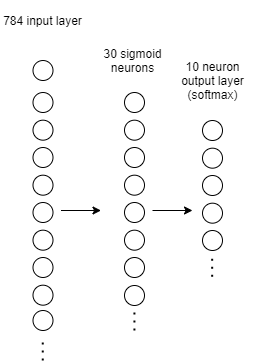

In [ ]:
model5 = Sequential()

model5.add(tensorflow.keras.layers.InputLayer(INPUT_SHAPE))
model5.add(tensorflow.keras.layers.Flatten())
model5.add(tensorflow.keras.layers.Dense(num_classes * 3, activation='sigmoid'))
model5.add(tensorflow.keras.layers.Dense(num_classes, activation='softmax'))

model5.compile(metrics=['accuracy'], optimizer=SGD, loss='mean_squared_error')

model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0441 - accuracy: 0.7299 - val_loss: 0.0303 - val_accuracy: 0.8337
Métricas para o conjunto de testes:	Acurácia: 0.8361	Precisão: 0.8363835268784967	Recall: 0.8330120606330157

Epoch 2/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0263 - accuracy: 0.8465 - val_loss: 0.0233 - val_accuracy: 0.8616
Métricas para o conjunto de testes:	Acurácia: 0.863	Precisão: 0.8635601044641755	Recall: 0.860913303057505

Epoch 3/30
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0233 - accuracy: 0.8549 - val_loss: 0.0247 - val_accuracy: 0.8403
Métricas para o conjunto de testes:	Acurácia: 0.8525	Precisão: 0.8579240701581304	Recall: 0.8494842775388772

Epoch 4/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0221 - accuracy: 0.8617 - val_loss: 0.0228 - val_accuracy: 0.8535
Métricas para o conjunto de testes:	Acurácia: 0.8636	Precisão: 0.8692127591277724	Recall: 0.8620

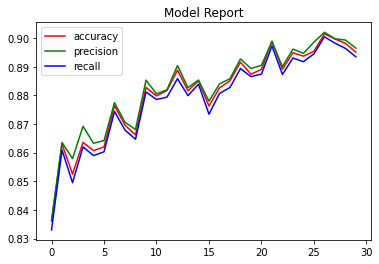

In [ ]:
history = model5.fit(train_X, train_label, batch_size = BATCH_SIZE, epochs=EPOCHS, callbacks=callback_list, validation_data=(valid_X, valid_label))

# Modelo 6

* Aumento da camada oculta do modelo anterior para 100 neurônios

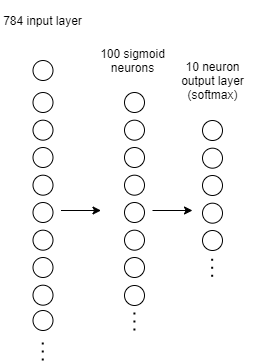

In [ ]:
model = Sequential()

model.add(tensorflow.keras.layers.InputLayer(INPUT_SHAPE))
model.add(tensorflow.keras.layers.Flatten())
model.add(tensorflow.keras.layers.Dense(num_classes * 10, activation='sigmoid'))
model.add(tensorflow.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(metrics=['accuracy'], optimizer=SGD, loss='mean_squared_error')

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0320 - accuracy: 0.8055 - val_loss: 0.0218 - val_accuracy: 0.8730
Métricas para o conjunto de testes:	Acurácia: 0.8805	Precisão: 0.8815888085979295	Recall: 0.8792310079276072

Epoch 2/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0194 - accuracy: 0.8854 - val_loss: 0.0173 - val_accuracy: 0.8955
Métricas para o conjunto de testes:	Acurácia: 0.9006	Precisão: 0.9007796507015484	Recall: 0.8993581426972052

Epoch 3/30
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0166 - accuracy: 0.8993 - val_loss: 0.0161 - val_accuracy: 0.9008
Métricas para o conjunto de testes:	Acurácia: 0.9065	Precisão: 0.9067922407541066	Recall: 0.9055270803301839

Epoch 4/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0160 - accuracy: 0.9016 - val_loss: 0.0168 - val_accuracy: 0.8961
Métricas para o conjunto de testes:	Acurácia: 0.9078	Precisão: 0.90938657562519	Recall: 0.9064

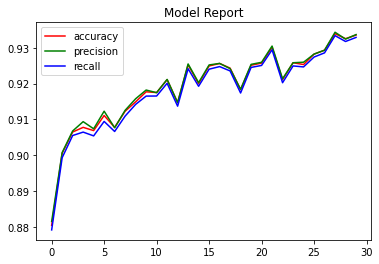

In [ ]:
history = model.fit(train_X, train_label, batch_size = BATCH_SIZE, epochs=EPOCHS, callbacks=callback_list, validation_data=(valid_X, valid_label))